Question 1 (2 Marks)

Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use from keras.datasets import fashion_mnist for getting the fashion mnist dataset

In [1]:
#Importing all the libraries that will be used
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")
!pip install wandb -qq
import wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


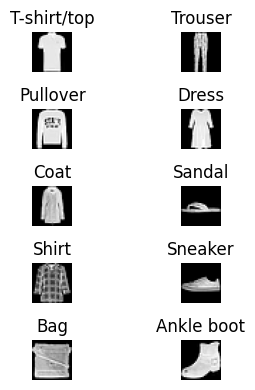

In [8]:
wandb.login(key='fbf80504ccef17f5f3b05723be7ea4caff805164')
wandb.init(project="CS23M030", name="Question_1")
#Load the fashion MNIST data

# dataset='mnist'
# if dataset=='fashion-mnist':
#   (X_train_com, Y_train_com), (X_test, Y_test) = fashion_mnist.load_data()
# else:
#   (X_train_com, Y_train_com), (X_test, Y_test) = mnist.load_data()


(X_train_com, Y_train_com), (X_test, Y_test) = fashion_mnist.load_data()
#Normalizing the data
X_train_com = X_train_com/255.0
X_test = X_test/255.0
np.random.seed(137)
encoder = OneHotEncoder()

#Splitting to get 10% data as validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train_com, Y_train_com, test_size=0.1, random_state=137)

Y_train_unencoded = Y_train
#One hot encoding of the class labels


Y_val = encoder.fit_transform(np.expand_dims(Y_val,1)).toarray()
Y_train = encoder.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_test = encoder.fit_transform(np.expand_dims(Y_test,1)).toarray()


# Defining the class labels of the 10 classess
class_labels={
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

#Let's start plotting one sample plot corressponding to each class
plt.figure(figsize=(4,4))
for i in range(10):
  plt.subplot(5,2,i+1)
  #get the first image with the i label
  img_index=next(index for index,label in enumerate(Y_train_unencoded) if label==i)
  plt.imshow(X_train[img_index],cmap='gray')
  plt.title(class_labels[i])
  plt.axis('off')
  wandb.log({"Fashion-MNIST": [wandb.Image(X_train[img_index],caption=class_labels[i])]})

plt.tight_layout()
plt.show()


wandb.finish()

Question 2 (10 Marks)

Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

Your code should be flexible such that it is easy to change the number of hidden layers and the number of neurons in each hidden layer.

In [3]:
class FeedForwardNN():
  """
  This class implements the forward propagation functionality of a feedforward neural network. It supports flexible hidden layer sizes and four different activation functions.

  Attributes:
      hidden_layer_sizes: A list containing the sizes of the hidden layers (the length of the list indicates the number of hidden layers in the network).
  """
  def __init__(self, hidden_layer_sizes):
    self.weights = {}
    self.biases = {}
    self.hidden_layer_sizes = hidden_layer_sizes
    self.input_layer_size=0
    self.output_layer_size=1
    # The array of layer sizes will be initialized after obtaining the input and output layer sizes
    self.layer_sizes = []

    self.A = {}
    self.H = {}



  def initialize_weights(self):
    """
    Initializes the weights between the layers of the network. Weights are randomly initialized.
    """
    self.layer_sizes = [self.input_layer_size] + self.hidden_layer_sizes + [self.output_layer_size]
    len_hl=len(self.hidden_layer_sizes)
    weight_counts = len_hl +1
    np.random.seed(137)
    np.random.RandomState(137)
    i=0
    while i<(weight_counts):
      # Initialize weights for each layer randomly as a matrix of size (previous layer size) * (next layer size)
      self.weights[i+1] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1])
     # Initialize biases for each layer to 0 as a matrix of size 1 * (next layer size)
      self.biases[i+1] = np.zeros((1, self.layer_sizes[i+1]))
      i+=1

  def calculate_activation(self, name, X):
    """
    Calculates the activation based on the specified activation function name. This function in turn calls the required activation function.
    """
    if name=="ReLU":
      s=self.ReLU(X)
      return s

    if name=="sigmoid":
      s=self.sigmoid(X)
      return s

    if name=="tanh":
      s=self.tanh(X)
      return s




  #calculate the ReLU function
  def ReLU(self,X):
    return X * (X > 0)
  # calculating the softmax function

  #function used
  def u1():
    return 1
  def softmax(self, X):
    X_max = np.max(X)
    exponentials = np.exp(X - X_max)
    return exponentials / np.sum(exponentials)




  # Utility function to calculate the sigmoid function
  def sigmoid(self,X):
    return 1.0/(1.0+np.exp(-X))

  def identity(self, X):
  # Utility to calculate identity function
    return X

  #calculating the cross entropy funtion
  def cross_entropy(self,Y_true,Y_pred):
    loss=np.multiply(Y_pred,Y_true)
    loss=loss[loss!=0]
    loss=-np.log(loss)
    loss=np.mean(loss)
    return loss



  #calculating the tanh funtion
  def tanh(self,X):
    return np.tanh(X)



  """
   Performing forward propagation in the data X.
  """
  def forward_prop(self, activation, X):


    self.H = {}
    #set i=0 for the while loop
    i=0
    self.A = {}
    #Make a row vector intialize the output from input layer as H[0] into a single row
    self.H[0] = X.reshape(1,-1)

    #formula for calculation
    #formula applied:a(x) = W_x*h(x-1) + b and h(a(x)) = activation(a(x)) for hidden layer

    while i<(len(self.hidden_layer_sizes)):
      mat = np.matmul(self.H[i], self.weights[i+1])
      self.A[i+1] =  mat + self.biases[i+1]
      cal=self.calculate_activation(activation, self.A[i+1])
      self.H[i+1] = cal
      i+=1

    # calculating hadamard and softmax at the output layer
    # for the output layer a(x) and h(a(x)) = softmax(a(x))
    mul=np.matmul(self.H[len(self.hidden_layer_sizes)], self.weights[len(self.hidden_layer_sizes)+1])
    self.A[len(self.hidden_layer_sizes)+1] = mul + self.biases[len(self.hidden_layer_sizes)+1]

    self.H[len(self.hidden_layer_sizes)+1] = self.softmax(self.A[len(self.hidden_layer_sizes)+1])
    return


  def fit(self, activation, X, Y):
    """
    This method trains the model with the given data (X, Y) by performing a single forward pass and producing the probabilities calculated at the output layer.
    """

    # columns in output (label count)
    self.output_layer_size = Y.shape[1]

    # features in data(features)
    self.input_layer_size = X.shape[1]*X.shape[1]

    output_prob = []
    self.initialize_weights()

    for x, y in zip(X, Y):
      #Forward Propogation
      self.forward_prop(activation, x)

      output_prob.append(self.H[len(self.hidden_layer_sizes)+1][0])
    return output_prob



In [4]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

# model = FeedForwardNN([128,128,128])
# activation_name = "ReLU"
# class_predictions = model.fit(activation_name, X_train, Y_train)
# #Class probabilities for 0th indexed image

# np.set_printoptions(suppress=True)
# print(class_predictions[0])

Question 3 (24 Marks)

Implement the backpropagation algorithm with support for the following optimisation functions

    sgd
    momentum based gradient descent
    nesterov accelerated gradient descent
    rmsprop
    adam
    nadam

(12 marks for the backpropagation framework and 2 marks for each of the optimisation algorithms above)

We will check the code for implementation and ease of use (e.g., how easy it is to add a new optimisation algorithm such as Eve). Note that the code should be flexible enough to work with different batch sizes.

In [5]:
# #An independent function which calculated accuracy given the true and predicted class labels
def accuracy(y_true, y_pred):
  """
  calculating the accuracy
  """
  acc = np.sum(np.equal(y_true,y_pred))/y_true.shape[0]
  return acc

In [6]:
"""
Class for implementing the feedforward neural network's forward propagation functionality.
"""
class FeedForwardNN():
  def __init__(self, hidden_layer_sizes, optimizer, activation_function, output_activation, loss_function, epochs = 1, batch_size = 4, initialization = "Random", log=0, console_log = 1, train_losses_list = None, train_accuracy_list = None, val_losses_list = None, val_accuracy_list = None):
    """


    - log: Log onto WandB (default 0).
    - console_log: Log onto console (default 1).
    -self: Reference to the object itself.
    - hidden_layer_sizes: List indicating the sizes of hidden layers (number of hidden layers for the network).
    """
    self.hidden_layer_sizes = hidden_layer_sizes
    self.optimizer = optimizer
    self.input_layer_size=0
    self.output_layer_size=1
    self.epochs = epochs
    #- batch_size: Batch size (default 1024).
    self.batch_size = batch_size
    self.loss_function = loss_function
    self.dw = {}
    self.db = {}
    self.activation_function = activation_function
    self.output_activation = output_activation


    #- initialization: Weight initialization method (default "Random").
    self.initialization = initialization
    #Layer sizes array will be initialzed after input and output layer size is obtained
    self.weights = {}
    self.biases = {}
    self.val_losses_list = val_losses_list
    self.val_accuracy_list = val_accuracy_list
    self.log = log
    self.console_log = console_log
    self.layer_sizes = []

    self.dA = {}
    self.dH = {}
    self.A = {}
    self.H = {}


    self.train_losses_list = train_losses_list
    self.train_accuracy_list = train_accuracy_list



  def initialize_weights(self):
    """
    initilizing the weights
    """
    np.random.seed(137)
    np.random.RandomState(137)
    self.layer_sizes = [self.input_layer_size] + self.hidden_layer_sizes + [self.output_layer_size]
    weight_counts = len(self.hidden_layer_sizes)
    weight_counts+=1

    self.optimizer.initialize(self.layer_sizes)
    #defining a utility function
    def utility_x():
      return 1;
    i=0
    while i<(weight_counts):

      if self.initialization == "Xavier":
        # using the xavier method to iniliatize the weights
        limit = np.sqrt(2 / float(self.layer_sizes[i] + self.layer_sizes[i+1]))
        self.weights[i+1] = np.random.normal(0.0, limit, size=(self.layer_sizes[i], self.layer_sizes[i+1]))


      if self.initialization == "random":

        self.weights[i+1] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1])


      #setting the biases
      self.biases[i+1] = np.zeros((1, self.layer_sizes[i+1]))
      i+=1



  def forward_prop(self, X):
    """
    performing forward propagation on the data X
    """
    self.H = {}
    self.A = {}

    i=0
    #initializing i for while loop
    self.H[0] = X.reshape(1,-1)


    while i<(len(self.hidden_layer_sizes)):
      mat=np.matmul(self.H[i], self.weights[i+1])
      fin=mat+self.biases[i+1]
      self.A[i+1] =  fin
      self.H[i+1] = self.activation_function.calculate_activation(self.A[i+1])
      i+=1

    #perform a(x) and h(a(x)) = softmax(a(x))
    temp=np.matmul(self.H[len(self.hidden_layer_sizes)], self.weights[len(self.hidden_layer_sizes)+1])
    ad=temp + self.biases[len(self.hidden_layer_sizes)+1]
    self.A[len(self.hidden_layer_sizes)+1] =  ad
    self.H[len(self.hidden_layer_sizes)+1] = self.output_activation.calculate_activation(self.A[len(self.hidden_layer_sizes)+1])
    return

  def back_prop(self, X, Y,  dw_i, db_i):
    """
    performing backward propogation .
    """
    #calculate the gradient of loss wrt the activation of output layer
    self.dA[len(self.hidden_layer_sizes)+1] = self.loss_function.last_output_derivative(self.H[len(self.hidden_layer_sizes)+1], Y, self.output_activation.calculate_derivative(self.A[len(self.hidden_layer_sizes)+1]))

    #using the formula taught in the class,that is applying chain rule here
    for i in range(len(self.hidden_layer_sizes), -1, -1):
      dw_i[i+1] = np.matmul(self.H[i].T, self.dA[i+1])

      db_i[i+1] = self.dA[i+1]
      if i!=0:

        self.dH[i] = np.matmul(self.dA[i+1],self.weights[i+1].T)

        self.dA[i] = np.multiply(self.activation_function.calculate_derivative(self.A[i]), self.dH[i])

    return dw_i, db_i


  def fit(self, X, Y, X_val, Y_val):
    """
    func to fit the data (X,Y) on the model. This performs forward + backward pass for epoch number of times. Gradient is updated after each batch is processed.
    """
    # columns in output (label count)
    self.output_layer_size = Y.shape[1]
    self.input_layer_size = X.shape[1]*X.shape[1] # Number of features in data(features)

    self.initialize_weights()
    for e in range(self.epochs):
      y_preds = []

      count = -1
      for i in range(len(self.hidden_layer_sizes)+1):
        self.dw[i+1] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
        self.db[i+1] = np.zeros((1, self.layer_sizes[i+1]))

      for x, y in zip(X, Y):
        dw_i = {}
        db_i = {}
        count += 1

        if count==self.batch_size:
          #Done wih current batch
          count = 0
          #checking it the optimizer is nag
          if self.optimizer.optimizer_name()=="nag":
            w_look_ahead = {}
            b_look_ahead = {}
            for i in range(len(self.hidden_layer_sizes)+1):
              sub_w= self.optimizer.beta*self.optimizer.update_history_w[i+1]
              w_look_ahead[i+1] = self.weights[i+1] - sub_w
              sub_b=self.optimizer.beta*self.optimizer.update_history_b[i+1]
              b_look_ahead[i+1] = self.biases[i+1] -sub_b

            #updating the biases
            biases_old = self.biases
            #updating the weights
            weights_old = self.weights

            self.weights = w_look_ahead
            self.biases = b_look_ahead
            self.forward_prop(x)
            dw_look_ahead, db_look_ahead = self.back_prop(x,y, dw_i, db_i)
            self.weights, self.biases = self.optimizer.update_parameters(weights_old, biases_old, dw_look_ahead, db_look_ahead, self.hidden_layer_sizes)

          else:
            self.weights, self.biases = self.optimizer.update_parameters(self.weights, self.biases, self.dw, self.db, self.hidden_layer_sizes)
          for i in range(len(self.hidden_layer_sizes)+1):
            self.dw[i+1] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
            self.db[i+1] = np.zeros((1, self.layer_sizes[i+1]))


        #Forward Propogation
        self.forward_prop(x)



        #Predictions
        y_preds.append(self.H[len(self.hidden_layer_sizes)+1])

        #Backward Propogation using Loss funtion
        self.back_prop(x,y, dw_i, db_i)

        #defining a function for calculating the derivative(NT)
        def derivative_of_x(x):
          exponentials = np.exp(x)
          return exponentials / np.sum(exponentials)

        for i in range(len(self.hidden_layer_sizes)+1):
          self.dw[i+1] += dw_i[i+1]
          self.db[i+1] += db_i[i+1]

      #Update weights based on loss(GD hence once every epoch update)
      if self.optimizer.optimizer_name()=="nag":
        w_look_ahead = {}
        b_look_ahead = {}
        for i in range(len(self.hidden_layer_sizes)+1):
          w_look_ahead[i+1] = self.weights[i+1] - self.optimizer.beta*self.optimizer.update_history_w[i+1]
          b_look_ahead[i+1] = self.biases[i+1] - self.optimizer.beta*self.optimizer.update_history_b[i+1]

        weights_old = self.weights
        biases_old = self.biases
        self.weights = w_look_ahead
        self.biases = b_look_ahead
        self.forward_prop(x)
        dw_look_ahead, db_look_ahead = self.back_prop(x,y, dw_i, db_i)
        self.weights, self.biases = self.optimizer.update_parameters(weights_old, biases_old, dw_look_ahead, db_look_ahead, self.hidden_layer_sizes)

      else:
        self.weights, self.biases = self.optimizer.update_parameters(self.weights, self.biases, self.dw, self.db, self.hidden_layer_sizes)
      y_preds = np.array(y_preds).squeeze()
      y_preds_validation = self.predict(X_val)
      #getting all the losses and updation
      training_loss = self.loss_function.calculate_loss(Y, y_preds, self.batch_size)
      validation_loss = self.loss_function.calculate_loss(Y_val, y_preds_validation, self.batch_size)
      #getting accuracy
      training_accuracy = accuracy(np.argmax(Y,1), np.argmax(y_preds,1))
      validation_accuracy = accuracy(np.argmax(Y_val,1), np.argmax(y_preds_validation,1))
      if self.log==1:
        #Log metrics to wandb
        wandb.log({"Training_accuracy": training_accuracy, "Validation_accuracy": validation_accuracy, "Training_loss": training_loss, "Validation_loss": validation_loss, 'Epoch': e+1})
      if self.console_log == 1:
        #Log results to console
        print("Epoch: ",e+1," Training Loss: ",training_loss, " Validation Loss:",validation_loss ," Training Accuracy: ",training_accuracy, " Validation Accuracy:", validation_accuracy)
      if self.val_accuracy_list != None:
        self.val_accuracy_list.append(validation_accuracy)
      if self.val_losses_list != None:
        self.val_losses_list.append(validation_loss)
      if self.train_accuracy_list != None:
        self.train_accuracy_list.append(training_accuracy)
      if self.train_losses_list != None:
        self.train_losses_list.append(training_loss)

    return training_loss, validation_loss, training_accuracy, validation_accuracy

  def predict(self, X):

    out_prob = []
    #function to predict and storing the result in the out_prob
    for x in X:
      values = self.forward_prop(x)
      predictions = self.H[len(self.hidden_layer_sizes)+1]
      out_prob.append(predictions)

    out_prob = np.array(out_prob).squeeze()
    return out_prob



In [7]:
class StocasticGD():
  """
  This class implements the Stochastic Gradient Descent (SGD) optimizer.

  Parameters:

    learning_rate: The rate at which the optimizer updates the weights during training.
    weight_decay: The factor by which the optimizer reduces the weights to combat overfitting.
    """
  def __init__(self, learning_rate = 0.001, weight_decay = 0.0):
    self.learning_rate = learning_rate
    self.weight_decay = weight_decay

  def set_learning_rate(self, learning_rate):
    self.learning_rate = learning_rate
  def set_uts():
    a=np.ones(5)
    return a

  def set_initial_parameters(self, parameters):
    self.learning_rate = parameters["learning_rate"]
    self.weight_decay = parameters["weight_decay"]

  def set_weight_decay(self, weight_decay):
    self.weight_decay = weight_decay


  def optimizer_name(self):
    return "gd"

  def initialize(self, all_layers):
    return


  #this function updates all the parameters
  #like weights,biases,dw,db,layers
  def update_parameters(self, weights, biases, dw, db, layers):

    i=0
    #formula I used below is same as what we taught in class that is upadating weights and biases for every datapoints
    while i<(len(layers)+1):
        dw[i+1] = dw[i+1] + self.weight_decay*weights[i+1]


        weights[i+1] = weights[i+1] - self.learning_rate * dw[i+1]

        biases[i+1] = biases[i+1] - self.learning_rate * db[i+1]
        i+=1
    return weights, biases


class MomentumGD():
  """
  This class defines the Momentum Gradient Descent optimizer.

  Parameters:

    learning_rate: The rate at which the optimizer adjusts the weights during training.
    weight_decay: The factor by which the optimizer reduces the weights to prevent overfitting.
    beta: The momentum parameter for the optimizer.
  """
  def __init__(self, learning_rate = 0.001, beta = 0.001, weight_decay = 0.0):
    self.learning_rate = learning_rate
    self.update_history_w = {}
    self.update_history_b = {}
    self.beta = beta
    self.initialized = False
    self.weight_decay = weight_decay


  def optimizer_name(self):
    return "momentum"


  def set_weight_decay(self, weight_decay):
    self.weight_decay = weight_decay

  def initialize(self, all_layers):
    self.update_history_w.clear()
    self.update_history_b.clear()
    i=0
    while i<(len(all_layers)-1):
      self.update_history_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.update_history_b[i+1] = np.zeros((1, all_layers[i+1]))
      i+=1




  def set_learning_rate(self, learning_rate):
    self.learning_rate = learning_rate

  def set_initial_parameters(self, parameters):
    self.learning_rate = parameters["learning_rate"]
    self.beta = parameters["beta"]
    self.weight_decay = parameters["weight_decay"]


  def update_parameters(self, weights, biases, dw, db, layers):
    """
    updating the parameters
    """
    i=0
    while i<(len(layers)+1):
        dw[i+1] = dw[i+1] + self.weight_decay*weights[i+1]

        self.update_history_w[i+1] =self.beta*self.update_history_w[i+1] + self.learning_rate*dw[i+1]
        weights[i+1] = weights[i+1] - self.update_history_w[i+1]

        self.update_history_b[i+1] =self.beta*self.update_history_b[i+1] + self.learning_rate*db[i+1]
        biases[i+1] = biases[i+1] - self.update_history_b[i+1]
        i+=1
    return weights, biases


class NAG():
  """
  This class is for implementing the Nesterov accelerated Gradient Descent optimizer.

  Parameters:

    learning_rate: The rate at which the optimizer adjusts the weights during training.
    beta: The momentum parameter for the optimizer.
    """
  def __init__(self, learning_rate = 0.001, beta = 0.9):
    self.w_look_ahead={}
    self.beta = beta
    #setting the look_ahead symbol
    self.b_look_ahead={}

    self.db_look_ahead={}
    #setting the learning rate
    self.learning_rate = learning_rate

    self.initialized = False
    self.update_history_w = {}
    self.dw_look_ahead={}
    self.update_history_b = {}

  def optimizer_name(self):
    return "nag"



  def initialize(self, all_layers):
    self.w_look_ahead.clear()
    self.update_history_b.clear()
    #clearing all the parameters
    self.b_look_ahead.clear()
    self.update_history_w.clear()
    self.db_look_ahead.clear()
    self.dw_look_ahead.clear()


    for i in range(len(all_layers)-1):
      self.update_history_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.update_history_b[i+1] = np.zeros((1, all_layers[i+1]))
      self.dw_look_ahead[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.db_look_ahead[i+1] = np.zeros((1, all_layers[i+1]))
      self.w_look_ahead[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.b_look_ahead[i+1] = np.zeros((1, all_layers[i+1]))



  def set_initial_parameters(self, parameters):
    self.learning_rate = parameters["learning_rate"]
    self.beta = parameters["beta"]

  def set_learning_rate(self, learning_rate):
    self.learning_rate = learning_rate



  def update_parameters(self, weights, biases, dw, db, layers):
    """
    updating the parameters
    """
    i=0
    while i<(len(layers)+1):
        self.update_history_w[i+1] = self.beta*self.update_history_w[i+1] + self.learning_rate*dw[i+1]
        self.update_history_b[i+1] = self.beta*self.update_history_b[i+1] + self.learning_rate*db[i+1]
        weights[i+1] = weights[i+1] - self.update_history_w[i+1]
        biases[i+1] = biases[i+1] - self.update_history_b[i+1]
        i+=1

    return weights, biases


class RMSProp():
  """
  This class implements the RMSProp optimizer.

  Parameters:

    learning_rate: The rate at which the optimizer adjusts the weights during training.
    weight_decay: Weight decay parameter for regularization.
    beta: The momentum parameter for the optimizer.
    epsilon: A small value added to the denominator to prevent division by zero.
    """


  def __init__(self, learning_rate = 0.001, beta = 0.001, epsilon = 1e-8, weight_decay = 0.0):
    self.learning_rate = learning_rate
    #_init_ function initializes all the parameters
    self.v_w = {}
    self.v_b = {}
    self.epsilon = epsilon
    self.beta = beta


    self.initialized = False
    self.weight_decay = weight_decay

  def initialize(self, all_layers):
    self.v_b.clear()
    self.v_w.clear()

    i=0
    while i<(len(all_layers)-1):
      self.v_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.v_b[i+1] = np.zeros((1, all_layers[i+1]))
      i+=1

  def set_weight_decay(self, weight_decay):
    self.weight_decay = weight_decay

  def optimizer_name(self):
    return "rmsprop"

  def set_learning_rate(self, learning_rate):
    self.learning_rate = learning_rate



  def set_initial_parameters(self, parameters):
    self.learning_rate = parameters["learning_rate"]
    self.beta = parameters["beta"]
    self.epsilon = parameters["epsilon"]
    self.weight_decay = parameters["weight_decay"]


  def update_parameters(self, weights, biases, dw, db, layers):
    """
    updating the parameters
    """
    i=0
    while i<(len(layers)+1):
      #iteratively updating the weights and biases
        dw[i+1] = dw[i+1] + self.weight_decay*weights[i+1]
        self.v_w[i+1] =self.beta*self.v_w[i+1] + (1-self.beta)* ((dw[i+1])**2)
        self.v_b[i+1] =self.beta*self.v_b[i+1] + (1-self.beta)* ((db[i+1])**2)

        weights[i+1] = weights[i+1] - ((self.learning_rate)/np.sqrt(self.v_w[i+1] + self.epsilon))*dw[i+1]
        biases[i+1] = biases[i+1] - ((self.learning_rate)/np.sqrt(self.v_b[i+1] + self.epsilon))*db[i+1]
        i+=1
    return weights, biases


class Adam():
  """
  This class defines the Adam optimizer.

  Parameters:

    learning_rate: The rate at which the optimizer adjusts the weights during training.
    weight_decay: Weight decay parameter for regularization.
    beta1: The exponential decay rate for the first moment estimates.
    beta2: The exponential decay rate for the second moment estimates.
    epsilon: A small value added to the denominator to prevent division by zero.
    """
  def __init__(self, learning_rate = 0.001,beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, weight_decay = 0.0):
    self.learning_rate = learning_rate
    self.beta1 = beta1
    self.beta2 = beta2
    self.v_w = {}
    self.v_b = {}
    self.epsilon = epsilon
    self.initialized = False
    self.iterations = 1
    self.weight_decay = weight_decay

    self.m_w = {}
    self.m_b = {}


  def initialize(self, all_layers):
    self.v_w.clear()
    self.v_b.clear()
    self.m_w.clear()
    self.m_b.clear()
    i=0
    while i<(len(all_layers)-1):
      self.v_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.v_b[i+1] = np.zeros((1, all_layers[i+1]))
      self.m_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.m_b[i+1] = np.zeros((1, all_layers[i+1]))
      i+=1

  def set_learning_rate(self, learning_rate):
    self.learning_rate = learning_rate

  def optimizer_name(self):
    return "adam"

  def set_weight_decay(self, weight_decay):
    self.weight_decay = weight_decay



  def set_initial_parameters(self, parameters):
    self.learning_rate = parameters["learning_rate"]
    self.beta1 = parameters["beta1"]
    self.beta2 = parameters["beta2"]
    self.epsilon = parameters["epsilon"]
    self.weight_decay = parameters["weight_decay"]


  def update_parameters(self, weights, biases, dw, db, layers):
    """
    updating the parameters
    """
    i=0
    while i<(len(layers)+1):

        dw[i+1] = dw[i+1] + self.weight_decay*weights[i+1]

        self.m_w[i+1] = self.beta1*self.m_w[i+1] + (1-self.beta1)* (dw[i+1])
        self.m_b[i+1] = self.beta1*self.m_b[i+1] + (1-self.beta1)* (db[i+1])
        self.v_w[i+1] = self.beta2*self.v_w[i+1] + (1-self.beta2)* ((dw[i+1])**2)
        self.v_b[i+1] = self.beta2*self.v_b[i+1] + (1-self.beta2)* ((db[i+1])**2)

        #this is the formula taught in the class
        m_w_hat = self.m_w[i+1]/(1-(self.beta1**self.iterations))
        m_b_hat = self.m_b[i+1]/(1-(self.beta1**self.iterations))
        v_w_hat = self.v_w[i+1]/(1-(self.beta2**self.iterations))
        v_b_hat = self.v_b[i+1]/(1-(self.beta2**self.iterations))

        #updating the weights
        weights[i+1] = weights[i+1] - ((self.learning_rate)/(np.sqrt(v_w_hat) + self.epsilon))*(m_w_hat)
        biases[i+1] = biases[i+1] - ((self.learning_rate)/(np.sqrt(v_b_hat) + self.epsilon))*(m_b_hat)
        i+=1
    #moving to next iteration
    self.iterations += 1

    return weights, biases


class Nadam():

  """
  Defines the NAdam optimizer.

  Parameters:

    learning_rate: Rate at which the optimizer updates the weights during training.
    weight_decay: Weight decay parameter for regularization.
    beta1: Exponential decay rate for the first moment estimates.
    beta2: Exponential decay rate for the second moment estimates.
    epsilon: Small value added to the denominator to prevent division by zero.
    """
  def __init__(self, learning_rate = 0.001, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, weight_decay = 0.0):
    self.learning_rate = learning_rate
    self.beta1 = beta1
    self.beta2 = beta2
    self.v_w = {}
    self.v_b = {}
    self.epsilon = epsilon
    self.initialized = False

    self.m_w = {}
    self.m_b = {}
    self.iterations = 1
    self.weight_decay = weight_decay

  def initialize(self, all_layers):
    self.v_w.clear()
    self.v_b.clear()
    self.m_w.clear()
    self.m_b.clear()
    i=0
    while i<(len(all_layers)-1):
      self.v_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.v_b[i+1] = np.zeros((1, all_layers[i+1]))
      self.m_w[i+1] = np.zeros((all_layers[i], all_layers[i+1]))
      self.m_b[i+1] = np.zeros((1, all_layers[i+1]))
      i+=1

  def set_learning_rate(self, learning_rate):
    self.learning_rate = learning_rate

  def set_weight_decay(self, weight_decay):
    self.weight_decay = weight_decay

  def optimizer_name(self):
    return "nadam"

  def set_initial_parameters(self, parameters):
    self.learning_rate = parameters["learning_rate"]
    self.beta1 = parameters["beta1"]
    self.beta2 = parameters["beta2"]
    self.epsilon = parameters["epsilon"]
    self.weight_decay = parameters["weight_decay"]


  def update_parameters(self, weights, biases, dw, db, layers):
    """
    updating the parameters
    """
    i=0
    while i<(len(layers)+1):

        #this is the gradient
        dw[i+1] = dw[i+1] + self.weight_decay*weights[i+1]

        self.m_w[i+1] = self.beta1*self.m_w[i+1] + (1-self.beta1)* (dw[i+1])
        self.m_b[i+1] = self.beta1*self.m_b[i+1] + (1-self.beta1)* (db[i+1])

        self.v_w[i+1] = self.beta2*self.v_w[i+1] + (1-self.beta2)* ((dw[i+1])**2)
        self.v_b[i+1] = self.beta2*self.v_b[i+1] + (1-self.beta2)* ((db[i+1])**2)

        #calculating the m_w_hat and m_b_hat
        m_w_hat = self.m_w[i+1]/(1-(self.beta1**self.iterations))
        m_b_hat = self.m_b[i+1]/(1-(self.beta1**self.iterations))

         #calculating the v_w_hat and v_b_hat
        v_w_hat = self.v_w[i+1]/(1-(self.beta2**self.iterations))
        v_b_hat = self.v_b[i+1]/(1-(self.beta2**self.iterations))

        #updating the weights and biases
        weights[i+1] = weights[i+1] - ((self.learning_rate)/(np.sqrt(v_w_hat) + self.epsilon))*(self.beta1 * m_w_hat + ((1-self.beta1)/(1-(self.beta1**self.iterations))*dw[i+1]))
        biases[i+1] = biases[i+1] - ((self.learning_rate)/(np.sqrt(v_b_hat) + self.epsilon))*(self.beta1 * m_b_hat + ((1-self.beta1)/(1-(self.beta1**self.iterations))*db[i+1]))
        i+=1

    self.iterations += 1

    return weights, biases


In [8]:
class Softmax():
  """
  Class of Softmax activation function.
  """
  def calculate_derivative(self, X):
    softmax = self.calculate_activation(X)
    return softmax*(1-softmax)

  def calculate_activation(self, X):
    #Utility to calculate softmax function
    X_max = np.max(X)
    exponentials = np.exp(X - X_max)
    return exponentials / np.sum(exponentials)


class Sigmoid():
  """
  Implementing Sigmoid activation function.
  """
  def calculate_derivative(self, X):
    val = self.calculate_activation(X)
    return val*(1-val)

  def calculate_activation(self, X):
    return 1.0/(1.0+np.exp(-X))


class Tanh():
  """
  implementing Tanh activation function.
  """
  def calculate_derivative(self,X):
    s=1 - (np.tanh(X) ** 2)
    return s

  def calculate_activation(self,X):
    s=np.tanh(X)
    return s


class Identity():
    def calculate_activation(self, X):
        return X

    def calculate_derivative(self, X):
        # Derivative of the identity function is always 1
        return np.ones_like(X)

class ReLU():
  """
  Class to implement ReLU activation function.
  """
  def calculate_derivative(self,X):
    X[X <= 0.0] = 0.0
    X[X > 0.0] = 1.0
    return X
  def calculate_activation(self,X):
    return X * (X > 0)

In [9]:
class CrossEntropy():
  """
  cross entropy loss function

  """
  #this function returns the name cross_entropy_loss
  def name(self):
    return "cross_entropy_loss"

  def calculate_loss(self, Y_true, Y_pred, batch_size):
    #this function calculates the loss
    for p in Y_pred[0]:
      if np.isnan(p) or p<10e-8:
        p=10e-8
    loss=np.multiply(Y_pred,Y_true)
    loss=loss[loss!=0]
    loss=-np.log(loss)
    loss=np.mean(loss)

    return loss

  def calculate_derivative(self, Y_pred,Y_true):
    return -Y_true/(Y_pred)

  def last_output_derivative(self, Y_pred,Y_true,activation_derivative):
    for p in Y_pred[0]:
      if np.isnan(p) or p<10e-8:
        p=10e-8
    return -(Y_true - Y_pred)




class SquaredErrorLoss():
  """
  squared loss function
  """

  def name(self):
    #this function returns the name of the loss
    return "squared_loss"

  def calculate_derivative(self, Y_pred,Y_true):
    return (Y_pred)*(Y_pred-Y_true)/len(Y_true)
  def calculate_loss(self, Y_true, Y_pred, batch_size):
    return (1/2) * np.sum((Y_pred-Y_true)**2)/len(Y_true)



  def last_output_derivative(self, Y_pred,Y_true, activation_derivative):
    for p in Y_pred[0]:
      if np.isnan(p) or p<10e-8:
        p=10e-8
    return (Y_pred - Y_true)*activation_derivative/len(Y_true)


In [10]:
#Add layer sizes for the hidden layers
layers = [32, 32, 32]

optimizers = {"gradient_descent":StocasticGD(), "momentum_gd":MomentumGD(), "nag":NAG(), "rmsprop":RMSProp(), "adam":Adam(), "nadam":Nadam()}
loss_functions = {"cross_entropy":CrossEntropy(), "squared_loss":SquaredErrorLoss()}
activation_functions = {"sigmoid": Sigmoid(), "softmax":Softmax(), "tanh": Tanh(), "ReLU":ReLU()}


#Select optimizer(momentum)
optimizer_momentum = optimizers["momentum_gd"]
optimizer_parameters_momentum = {"learning_rate":0.0001, "beta":0.6, "weight_decay":0}
#optimizer_parameters_momentum = {"learning_rate":0.01, "beta":0.9}

optimizer_momentum.set_initial_parameters(optimizer_parameters_momentum)

#Select optimizer(nag)
optimizer_nag = optimizers["nag"]
optimizer_parameters_nag = {"learning_rate":0.001, "beta":0.9}
optimizer_nag.set_initial_parameters(optimizer_parameters_nag)

#Select optimizer(sgd)
optimizer_sgd = optimizers["gradient_descent"]
optimizer_parameters_sgd = {"learning_rate":0.001, "weight_decay":0.5}
optimizer_sgd.set_initial_parameters(optimizer_parameters_sgd)

#Select optimizer(rmsprop)
optimizer_rmsprop = optimizers["rmsprop"]
optimizer_parameters_rmsprop = {"learning_rate":0.01, "beta":0.9, "epsilon":1e-8, "weight_decay":0.5}
optimizer_rmsprop.set_initial_parameters(optimizer_parameters_rmsprop)


#Select optimizer(nadam)
optimizer_nadam = optimizers["nadam"]
optimizer_parameters_nadam = {"learning_rate":0.0001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0}
optimizer_nadam.set_initial_parameters(optimizer_parameters_nadam)




#Select optimizer(adam)
optimizer_adam = optimizers["adam"]
optimizer_parameters_adam = {"learning_rate":0.0001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0.5}
optimizer_adam.set_initial_parameters(optimizer_parameters_adam)


#Select loss function
loss_cross_entropy = loss_functions["cross_entropy"]
loss_squared = loss_functions["squared_loss"]

#Select activation(hidden layers)
activation_sigmoid = activation_functions["sigmoid"]
activation_softmax = activation_functions["softmax"]
activation_tanh = activation_functions["tanh"]
activation_ReLU = activation_functions["ReLU"]
activation_iden=Identity()

#Select activation(output layer)
output_activation_softmax = activation_functions["softmax"]

# model = FeedForwardNN(layers, optimizer_adam, activation_ReLU, output_activation_softmax, loss_squared, 5, 512, initialization = "Xavier")
# model.fit(X_train, Y_train, X_val, Y_val)


In [11]:
# #Accuracy for test data
# y_preds = model.predict(X_test)
# print(accuracy(np.argmax(Y_test,1), np.argmax(y_preds,1)))

Question 4 (10 Marks)

Use the sweep functionality provided by wandb to find the best values for the hyperparameters listed below. Use the standard train/test split of fashion_mnist (use (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()). Keep 10% of the training data aside as validation data for this hyperparameter search. Here are some suggestions for different values to try for hyperparameters. As you can quickly see that this leads to an exponential number of combinations. You will have to think about strategies to do this hyperparameter search efficiently. Check out the options provided by wandb.sweep and write down what strategy you chose and why.

    number of epochs: 5, 10
    number of hidden layers: 3, 4, 5
    size of every hidden layer: 32, 64, 128
    weight decay (L2 regularisation): 0, 0.0005, 0.5
    learning rate: 1e-3, 1 e-4
    optimizer: sgd, momentum, nesterov, rmsprop, adam, nadam
    batch size: 16, 32, 64
    weight initialisation: random, Xavier
    activation functions: sigmoid, tanh, ReLU

wandb will automatically generate the following plots. Paste these plots below using the "Add Panel to Report" feature. Make sure you use meaningful names for each sweep (e.g. hl_3_bs_16_ac_tanh to indicate that there were 3 hidden layers, batch size was 16 and activation function was ReLU) instead of using the default names (whole-sweep, kind-sweep) given by wandb.

In [12]:
#,'identity'

In [13]:
sweep_config = {
    #random over the hyperparameters
    'name':'sweep13',
    'method': 'random',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'dataset':{
            'values': ['fashion-mnist']
        },

        'optimizer': {
            'values': ['sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam']
        },
        'epochs': {
            'values': [5,10]
        },
        'loss': {
            'values': ['mean_squared_error', 'cross_entropy']
        },
        'learning_rate': {
            'values': [ 0.001, 0.0001]
        },

        'weight_decay': {
            'values': [0.0, 0.0005, 0.5]
        },
        'momentum' : {
            'values': [0.5]
        },
        'beta': {
          'values' : [0.5]
        },
        'beta1' : {
            'values' : [0.5]
        },
        'beta2' : {
            'values' : [0.5]
        },
        'epsilon' :{
            'values' : [0.000001]
        },

        'activation': {
            'values': ['sigmoid' , 'tanh', 'ReLU']
        },
        'num_layers':{
            'values' : [3,4,5]
        },

        'hidden_size': {
            'values': [32,64,128]
        },
        'batch_size':{
            'values':[16,32,64]
        },
        'weight_init':{
            'values':['random','Xavier']
        }
    }
}
def train():

      config_defaults = {
          'epochs': 1,
          'learning_rate': 0.1,
          'momentum' : 0.5,
          'beta':0.5,
          'beta1':0.5,
          'beta2':0.5,
          'epsilon': 0.000001,
          'weight_init':'random',
          'num_layers':1,
          'hidden_size':4,
          'optimizer':'sgd',
          'activation':'sigmoid',
          'loss' : 'cross_entropy',
          'weight_decay' : 0.0,
          'batch_size':4
      }


    # with wandb.init(project='CS23M030',config = sweep_config, name="Question_345"):
      parameters = wandb.init(project='CS23M030',config = sweep_config, name="Question_4")
      config=parameters.config
      output = []
      hidden_size = config.hidden_size
      num_layers = config.num_layers

      for _ in range(num_layers):
          output.append(hidden_size)




      optimizers = {"gradient_descent":StocasticGD(), "momentum_gd":MomentumGD(), "nag":NAG(), "rmsprop":RMSProp(), "adam":Adam(), "nadam":Nadam()}
      loss_functions = {"cross_entropy":CrossEntropy(), "mean_squared_error":SquaredErrorLoss()}
      activation_functions = {"sigmoid": Sigmoid(), "softmax":Softmax(), "tanh": Tanh(), "ReLU":ReLU(),"identity":Identity()}

      #Setting custom run name
      wandb.run.name = 'epochs_' + str(config.epochs) + '_activation_' + config.activation + '_optimizer_' + config.optimizer + '_layers_' + str(len(output)) +'_decay_' + str(config.weight_decay) + '_beta_' + str(config.beta) + '_learning_rate_' + str(config.learning_rate) + '_batch_size_' + str(config.batch_size)

      # Config is a variable that holds and saves hyperparameters and inputs
      learning_rate = config.learning_rate
      weight_decay = config.weight_decay
      beta = config.beta
      beta1=config.beta1
      beta2=config.beta2
      momentum=config.momentum
      epochs = config.epochs
      hidden_size = config.hidden_size
      if config.loss=="cross_entropy":
        loss_cross_entropy=CrossEntropy()
      else:
        loss_cross_entropy=SquaredErrorLoss()


      if config.activation=="sigmoid":
        activation = activation_functions["sigmoid"]

      if config.activation=="tanh":
        activation = activation_functions["tanh"]

      if config.activation=="ReLU":
        activation = activation_functions["ReLU"]
      if config.activation=="identity":
        activation = activation_functions["identity"]

      output_activation = activation_functions["softmax"]

      if config.optimizer=="sgd":
        #optimizer selected is sgd
        optimizer = optimizers["gradient_descent"]
        optimizer_parameters_sgd = {"learning_rate":config.learning_rate, "weight_decay":weight_decay}
        optimizer.set_initial_parameters(optimizer_parameters_sgd)

      if config.optimizer=="momentum":
        #optimizer selected is momentum
        optimizer = optimizers["momentum_gd"]
        optimizer_parameters_momentum = {"learning_rate":config.learning_rate, "beta":config.momentum, "weight_decay":weight_decay}
        optimizer.set_initial_parameters(optimizer_parameters_momentum)

      if config.optimizer=="nag":
        #optimizer selected is nag
        optimizer = optimizers["nag"]
        optimizer_parameters_nag = {"learning_rate":config.learning_rate, "beta":config.momentum}
        optimizer.set_initial_parameters(optimizer_parameters_nag)

      if config.optimizer=="rmsprop":
        #optimizer selected is rmsprop
        optimizer = optimizers["rmsprop"]
        optimizer_parameters_rmsprop = {"learning_rate":config.learning_rate, "beta":config.beta, "epsilon":1e-8, "weight_decay":weight_decay}
        optimizer.set_initial_parameters(optimizer_parameters_rmsprop)

      if config.optimizer=="adam":
        #optimizer selected is adam
        optimizer = optimizers["adam"]
        optimizer_parameters_adam = {"learning_rate":config.learning_rate, "beta1":config.beta1, "beta2":config.beta2, "epsilon":1e-8, "weight_decay":weight_decay}
        optimizer.set_initial_parameters(optimizer_parameters_adam)

      if config.optimizer=="nadam":
        #optimizer selected is nadam
        optimizer = optimizers["nadam"]
        optimizer_parameters_nadam = {"learning_rate":config.learning_rate, "beta1":config.beta1, "beta2":config.beta2, "epsilon":1e-8, "weight_decay":weight_decay}
        optimizer.set_initial_parameters(optimizer_parameters_nadam)


      batch_size = config.batch_size
      initialization = config.weight_init
      #Training the model
      #Ensure that log=1 parameter is set for logging onto wandb
      model = FeedForwardNN(output, optimizer, activation, output_activation, loss_cross_entropy, epochs, batch_size, initialization , log=1, console_log = 1)

      train_loss, val_loss, train_accuracy, val_accuracy = model.fit(X_train, Y_train, X_val, Y_val)
      wandb.log({"accuracy": val_accuracy})


In [ ]:
sweep_id = wandb.sweep(sweep_config, project="CS23M030")
wandb.agent(sweep_id, train, count = 20)
wandb.finish()

Create sweep with ID: 10pbulji
Sweep URL: https://wandb.ai/cs23m030/CS23M030/sweeps/10pbulji


wandb: Agent Starting Run: ge97y0se with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.8754408399933326  Validation Loss: 0.8635189579798813  Training Accuracy:  0.12412962962962963  Validation Accuracy: 0.136
Epoch:  2  Training Loss:  0.8687723552879288  Validation Loss: 0.870900725120411  Training Accuracy:  0.1305185185185185  Validation Accuracy: 0.12866666666666668
Epoch:  3  Training Loss:  0.8726615127117646  Validation Loss: 0.8644788206834682  Training Accuracy:  0.1265  Validation Accuracy: 0.13483333333333333
Epoch:  4  Training Loss:  0.8737362976121138  Validation Loss: 0.8751199704362456  Training Accuracy:  0.1254259259259259  Validation Accuracy: 0.12366666666666666
Epoch:  5  Training Loss:  0.8752429885893762  Validation Loss: 0.8651699776154154  Training Accuracy:  0.1238888888888889  Validation Accuracy: 0.13366666666666666


Epoch,▁▃▅▆█
Training_accuracy,▁█▄▃▁
Training_loss,█▁▅▆█
Validation_accuracy,█▄▇▁▇
Validation_loss,▁▅▂█▂
accuracy,▁
Epoch,5
Training_accuracy,0.12389
Training_loss,0.87524
Validation_accuracy,0.13367
Validation_loss,0.86517


wandb: Agent Starting Run: 0p23s5py with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 4
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.15752316260776295  Validation Loss: 0.12282109665987764  Training Accuracy:  0.786  Validation Accuracy: 0.8281666666666667
Epoch:  2  Training Loss:  0.11442850836040996  Validation Loss: 0.11304500554371545  Training Accuracy:  0.8417592592592592  Validation Accuracy: 0.8375
Epoch:  3  Training Loss:  0.1065515495262531  Validation Loss: 0.10825691193336467  Training Accuracy:  0.8530555555555556  Validation Accuracy: 0.8468333333333333
Epoch:  4  Training Loss:  0.10227609751320153  Validation Loss: 0.10551962710344381  Training Accuracy:  0.8591296296296296  Validation Accuracy: 0.8506666666666667
Epoch:  5  Training Loss:  0.09950068991215465  Validation Loss: 0.10379136750430504  Training Accuracy:  0.8629074074074075  Validation Accuracy: 0.854
Epoch:  6  Training Loss:  0.09749989142579135  Validation Loss: 0.10260412769795223  Training Accuracy:  0.8658518518518519  Validation Accuracy: 0.8563333333333333
Epoch:  7  Training Loss:  0.09596346280932

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▁▅▆▇▇▇████
Training_loss,█▃▂▂▂▂▁▁▁▁
Validation_accuracy,▁▃▅▆▇▇████
Validation_loss,█▅▃▃▂▂▁▁▁▁
accuracy,▁
Epoch,10
Training_accuracy,0.8735
Training_loss,0.09281
Validation_accuracy,0.86083
Validation_loss,0.10056


wandb: Agent Starting Run: p3hfe16b with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 4
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.4610610392577849  Validation Loss: 0.46061076907298676  Training Accuracy:  0.036814814814814814  Validation Accuracy: 0.036833333333333336
Epoch:  2  Training Loss:  0.4600341212352411  Validation Loss: 0.4595892995201319  Training Accuracy:  0.04161111111111111  Validation Accuracy: 0.044833333333333336
Epoch:  3  Training Loss:  0.45902003964641647  Validation Loss: 0.4585796282749111  Training Accuracy:  0.04805555555555555  Validation Accuracy: 0.05266666666666667
Epoch:  4  Training Loss:  0.4580176259760603  Validation Loss: 0.4575805641587489  Training Accuracy:  0.05503703703703704  Validation Accuracy: 0.058833333333333335
Epoch:  5  Training Loss:  0.4570257288589213  Validation Loss: 0.4565909391864838  Training Accuracy:  0.06161111111111111  Validation Accuracy: 0.065
Epoch:  6  Training Loss:  0.4560432148562297  Validation Loss: 0.4556096107033304  Training Accuracy:  0.06933333333333333  Validation Accuracy: 0.07483333333333334
Epoch:  7  T

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▁▁▂▃▄▄▅▆▇█
Training_loss,█▇▆▆▅▄▃▃▂▁
Validation_accuracy,▁▂▂▃▄▅▅▆▇█
Validation_loss,█▇▆▆▅▄▃▃▂▁
accuracy,▁
Epoch,10
Training_accuracy,0.10583
Training_loss,0.45219
Validation_accuracy,0.11167
Validation_loss,0.45175


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yx8eq7fo with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  161.54952665337493  Validation Loss: 124.69488361803677  Training Accuracy:  0.33925925925925926  Validation Accuracy: 0.5185
Epoch:  2  Training Loss:  110.9248536241009  Validation Loss: 102.0857221785831  Training Accuracy:  0.5706666666666667  Validation Accuracy: 0.604
Epoch:  3  Training Loss:  91.91724979725701  Validation Loss: 86.7897573992902  Training Accuracy:  0.6299259259259259  Validation Accuracy: 0.6461666666666667
Epoch:  4  Training Loss:  78.26976397794779  Validation Loss: 75.93753867218689  Training Accuracy:  0.6616851851851852  Validation Accuracy: 0.6643333333333333
Epoch:  5  Training Loss:  68.54090104938959  Validation Loss: 67.87507099789588  Training Accuracy:  0.6797777777777778  Validation Accuracy: 0.6786666666666666
Epoch:  6  Training Loss:  61.54156154819891  Validation Loss: 60.9633150404472  Training Accuracy:  0.6932592592592592  Validation Accuracy: 0.69
Epoch:  7  Training Loss:  55.8238952010782  Validation Loss: 54.4

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▁▅▆▇▇█████
Training_loss,█▅▄▃▃▂▂▁▁▁
Validation_accuracy,▁▄▅▆▇▇▇▇██
Validation_loss,█▆▅▄▃▂▂▂▁▁
accuracy,▁
Epoch,10
Training_accuracy,0.72033
Training_loss,43.10687
Validation_accuracy,0.72
Validation_loss,44.13199


wandb: Agent Starting Run: 3l35950a with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 4
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  2.3052284614462617  Validation Loss: 2.2937911857833373  Training Accuracy:  0.1655185185185185  Validation Accuracy: 0.1755
Epoch:  2  Training Loss:  2.269917998989824  Validation Loss: 2.2574035017433105  Training Accuracy:  0.18424074074074073  Validation Accuracy: 0.17766666666666667
Epoch:  3  Training Loss:  2.234301597497909  Validation Loss: 2.2208022228278885  Training Accuracy:  0.1875740740740741  Validation Accuracy: 0.183
Epoch:  4  Training Loss:  2.1966702215147187  Validation Loss: 2.180391767599631  Training Accuracy:  0.19524074074074074  Validation Accuracy: 0.193
Epoch:  5  Training Loss:  2.1528702000663755  Validation Loss: 2.131970190277326  Training Accuracy:  0.20774074074074075  Validation Accuracy: 0.21183333333333335


Epoch,▁▃▅▆█
Training_accuracy,▁▄▅▆█
Training_loss,█▆▅▃▁
Validation_accuracy,▁▁▂▄█
Validation_loss,█▆▅▃▁
accuracy,▁
Epoch,5
Training_accuracy,0.20774
Training_loss,2.15287
Validation_accuracy,0.21183
Validation_loss,2.13197


wandb: Agent Starting Run: x34hs0lq with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.45396202609979747  Validation Loss: 0.45362505373816037  Training Accuracy:  0.08137037037037037  Validation Accuracy: 0.0865
Epoch:  2  Training Loss:  0.45366363950374894  Validation Loss: 0.4533289275349391  Training Accuracy:  0.08220370370370371  Validation Accuracy: 0.08716666666666667
Epoch:  3  Training Loss:  0.4533667422520623  Validation Loss: 0.45303419204466006  Training Accuracy:  0.08311111111111111  Validation Accuracy: 0.088
Epoch:  4  Training Loss:  0.453071224044452  Validation Loss: 0.45274074390148167  Training Accuracy:  0.08416666666666667  Validation Accuracy: 0.08916666666666667
Epoch:  5  Training Loss:  0.45277697881640033  Validation Loss: 0.4524484838937429  Training Accuracy:  0.08527777777777777  Validation Accuracy: 0.09
Epoch:  6  Training Loss:  0.4524839048202655  Validation Loss: 0.4521573168817891  Training Accuracy:  0.08631481481481482  Validation Accuracy: 0.09083333333333334
Epoch:  7  Training Loss:  0.452191904535

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▁▂▂▃▄▅▆▆▇█
Training_loss,█▇▆▆▅▄▃▃▂▁
Validation_accuracy,▁▂▂▃▄▄▅▆▇█
Validation_loss,█▇▆▆▅▄▃▃▂▁
accuracy,▁
Epoch,10
Training_accuracy,0.0905
Training_loss,0.45132
Validation_accuracy,0.09533
Validation_loss,0.451


wandb: Agent Starting Run: h7ciadjd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.157317015863938  Validation Loss: 0.12127799201384329  Training Accuracy:  0.7742037037037037  Validation Accuracy: 0.8281666666666667
Epoch:  2  Training Loss:  0.11164530486040845  Validation Loss: 0.10903021838431454  Training Accuracy:  0.8437777777777777  Validation Accuracy: 0.8448333333333333
Epoch:  3  Training Loss:  0.10170503155865995  Validation Loss: 0.09735566115009743  Training Accuracy:  0.8595  Validation Accuracy: 0.8645
Epoch:  4  Training Loss:  0.09636420662690004  Validation Loss: 0.09986414017845921  Training Accuracy:  0.8678333333333333  Validation Accuracy: 0.8618333333333333
Epoch:  5  Training Loss:  0.5610228951630648  Validation Loss: 0.9033333333333333  Training Accuracy:  0.42283333333333334  Validation Accuracy: 0.09666666666666666
Epoch:  6  Training Loss:  0.8996296296296297  Validation Loss: 0.9033333333333333  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  7  Training Loss:  0.8

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▇███▄▁▁▁▁▁
Training_loss,▂▁▁▁▅█████
Validation_accuracy,████▁▁▁▁▁▁
Validation_loss,▁▁▁▁██████
accuracy,▁
Epoch,10
Training_accuracy,0.10037
Training_loss,0.89963
Validation_accuracy,0.09667
Validation_loss,0.90333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gglzywqv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.4533049462723018  Validation Loss: 0.45025400214193145  Training Accuracy:  0.09924074074074074  Validation Accuracy: 0.10683333333333334
Epoch:  2  Training Loss:  0.45010327840634834  Validation Loss: 0.4500142163433934  Training Accuracy:  0.09942592592592593  Validation Accuracy: 0.0965
Epoch:  3  Training Loss:  0.45000656908315767  Validation Loss: 0.45003898982292406  Training Accuracy:  0.09762962962962964  Validation Accuracy: 0.09666666666666666
Epoch:  4  Training Loss:  0.4500105520181892  Validation Loss: 0.45004638397286667  Training Accuracy:  0.09988888888888889  Validation Accuracy: 0.09666666666666666
Epoch:  5  Training Loss:  0.4500119203657436  Validation Loss: 0.45004659667915997  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  6  Training Loss:  0.45001170730873014  Validation Loss: 0.45004533795057355  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  7

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▅▆▁▇██████
Training_loss,█▁▁▁▁▁▁▁▁▁
Validation_accuracy,█▁▁▁▁▁▁▁▁▁
Validation_loss,█▁▂▂▂▂▂▂▂▂
accuracy,▁
Epoch,10
Training_accuracy,0.10037
Training_loss,0.45001
Validation_accuracy,0.09667
Validation_loss,0.45004


wandb: Agent Starting Run: 8a84ic7l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  1.2340930279275464  Validation Loss: 0.8558397435445195  Training Accuracy:  0.6501111111111111  Validation Accuracy: 0.7146666666666667
Epoch:  2  Training Loss:  0.7376442699572043  Validation Loss: 0.6667901276886926  Training Accuracy:  0.7608333333333334  Validation Accuracy: 0.7738333333333334
Epoch:  3  Training Loss:  0.6098017444368523  Validation Loss: 0.582810919878059  Training Accuracy:  0.7991481481481482  Validation Accuracy: 0.7988333333333333
Epoch:  4  Training Loss:  0.5438478138196692  Validation Loss: 0.5361344086151236  Training Accuracy:  0.8172592592592592  Validation Accuracy: 0.8121666666666667
Epoch:  5  Training Loss:  0.5048703667810689  Validation Loss: 0.5074378574192026  Training Accuracy:  0.828037037037037  Validation Accuracy: 0.8206666666666667
Epoch:  6  Training Loss:  0.4795378478687412  Validation Loss: 0.4874385793778779  Training Accuracy:  0.8350555555555556  Validation Accuracy: 0.8275
Epoch:  7  Training Loss:  0.4

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▁▅▆▇▇▇████
Training_loss,█▄▃▂▂▁▁▁▁▁
Validation_accuracy,▁▄▆▆▇▇▇███
Validation_loss,█▅▃▃▂▂▂▁▁▁
accuracy,▁
Epoch,10
Training_accuracy,0.85067
Training_loss,0.42438
Validation_accuracy,0.84433
Validation_loss,0.43942


wandb: Agent Starting Run: u570ufnq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  77.77857575010022  Validation Loss: 21.90256282657559  Training Accuracy:  0.4693888888888889  Validation Accuracy: 0.4706666666666667
Epoch:  2  Training Loss:  8.661870389808517  Validation Loss: 3.262566493101325  Training Accuracy:  0.4640925925925926  Validation Accuracy: 0.4091666666666667
Epoch:  3  Training Loss:  2.3547975356532005  Validation Loss: 2.242543135377654  Training Accuracy:  0.41485185185185186  Validation Accuracy: 0.46016666666666667
Epoch:  4  Training Loss:  1.7979057762153519  Validation Loss: 2.131343765998229  Training Accuracy:  0.4542407407407407  Validation Accuracy: 0.4795
Epoch:  5  Training Loss:  1.680224557752178  Validation Loss: 1.774961992608475  Training Accuracy:  0.49364814814814817  Validation Accuracy: 0.5038333333333334


Epoch,▁▃▅▆█
Training_accuracy,▆▅▁▄█
Training_loss,█▂▁▁▁
Validation_accuracy,▆▁▅▆█
Validation_loss,█▂▁▁▁
accuracy,▁
Epoch,5
Training_accuracy,0.49365
Training_loss,1.68022
Validation_accuracy,0.50383
Validation_loss,1.77496


wandb: Agent Starting Run: vizws1w4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  6.884118047871642  Validation Loss: 4.3286590858618235  Training Accuracy:  0.371  Validation Accuracy: 0.492
Epoch:  2  Training Loss:  3.6209059923724847  Validation Loss: 3.1415613685173986  Training Accuracy:  0.5386666666666666  Validation Accuracy: 0.5711666666666667
Epoch:  3  Training Loss:  2.7002243482983035  Validation Loss: 2.5222420044156406  Training Accuracy:  0.5908703703703704  Validation Accuracy: 0.5956666666666667
Epoch:  4  Training Loss:  2.235904613598171  Validation Loss: 2.184042548723424  Training Accuracy:  0.6170555555555556  Validation Accuracy: 0.6125
Epoch:  5  Training Loss:  1.9094244076914022  Validation Loss: 1.9059276343626985  Training Accuracy:  0.6314814814814815  Validation Accuracy: 0.6345


Epoch,▁▃▅▆█
Training_accuracy,▁▆▇██
Training_loss,█▃▂▁▁
Validation_accuracy,▁▅▆▇█
Validation_loss,█▅▃▂▁
accuracy,▁
Epoch,5
Training_accuracy,0.63148
Training_loss,1.90942
Validation_accuracy,0.6345
Validation_loss,1.90593


wandb: Agent Starting Run: rnmp236q with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.44973945856687986  Validation Loss: 0.45003248691346565  Training Accuracy:  0.10366666666666667  Validation Accuracy: 0.09666666666666666
Epoch:  2  Training Loss:  0.45002067687226927  Validation Loss: 0.45003370216187105  Training Accuracy:  0.09540740740740741  Validation Accuracy: 0.09666666666666666
Epoch:  3  Training Loss:  0.45002069757127394  Validation Loss: 0.4500337716531187  Training Accuracy:  0.09566666666666666  Validation Accuracy: 0.09666666666666666
Epoch:  4  Training Loss:  0.4500206980716233  Validation Loss: 0.4500337824516057  Training Accuracy:  0.09566666666666666  Validation Accuracy: 0.09666666666666666
Epoch:  5  Training Loss:  0.4500206981674202  Validation Loss: 0.4500337826154423  Training Accuracy:  0.09564814814814815  Validation Accuracy: 0.09666666666666666


Epoch,▁▃▅▆█
Training_accuracy,█▁▁▁▁
Training_loss,▁████
Validation_accuracy,▁▁▁▁▁
Validation_loss,▁████
accuracy,▁
Epoch,5
Training_accuracy,0.09565
Training_loss,0.45002
Validation_accuracy,0.09667
Validation_loss,0.45003


wandb: Agent Starting Run: 8hqv0wg0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 3
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  1.37376366280858  Validation Loss: 0.9873772308919037  Training Accuracy:  0.5610740740740741  Validation Accuracy: 0.6585
Epoch:  2  Training Loss:  0.8805128619631797  Validation Loss: 0.8120828809854936  Training Accuracy:  0.6925925925925925  Validation Accuracy: 0.7091666666666666
Epoch:  3  Training Loss:  0.7622948248076293  Validation Loss: 0.7356872452950874  Training Accuracy:  0.7279629629629629  Validation Accuracy: 0.7341666666666666
Epoch:  4  Training Loss:  0.7026756875442749  Validation Loss: 0.6921443231108566  Training Accuracy:  0.7461296296296296  Validation Accuracy: 0.7458333333333333
Epoch:  5  Training Loss:  0.6658820522787742  Validation Loss: 0.6653265090673283  Training Accuracy:  0.759462962962963  Validation Accuracy: 0.758


Epoch,▁▃▅▆█
Training_accuracy,▁▆▇██
Training_loss,█▃▂▁▁
Validation_accuracy,▁▅▆▇█
Validation_loss,█▄▃▂▁
accuracy,▁
Epoch,5
Training_accuracy,0.75946
Training_loss,0.66588
Validation_accuracy,0.758
Validation_loss,0.66533


wandb: Agent Starting Run: o8ezqs8v with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.46559259503002187  Validation Loss: 0.4618531860462025  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  2  Training Loss:  0.46010559193939776  Validation Loss: 0.45813440223532376  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  3  Training Loss:  0.4573463251744723  Validation Loss: 0.4560214392775935  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  4  Training Loss:  0.4556634391907452  Validation Loss: 0.4546565628327391  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666
Epoch:  5  Training Loss:  0.454520429634083  Validation Loss: 0.45369631156493506  Training Accuracy:  0.10037037037037037  Validation Accuracy: 0.09666666666666666


Epoch,▁▃▅▆█
Training_accuracy,▁▁▁▁▁
Training_loss,█▅▃▂▁
Validation_accuracy,▁▁▁▁▁
Validation_loss,█▅▃▂▁
accuracy,▁
Epoch,5
Training_accuracy,0.10037
Training_loss,0.45452
Validation_accuracy,0.09667
Validation_loss,0.4537


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3oevizun with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	momentum: 0.5
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.5703108782983053  Validation Loss: 0.45231128754069355  Training Accuracy:  0.8031481481481482  Validation Accuracy: 0.8346666666666667
Epoch:  2  Training Loss:  0.4152888056834778  Validation Loss: 0.4050291085191367  Training Accuracy:  0.8497962962962963  Validation Accuracy: 0.854
Epoch:  3  Training Loss:  0.3791559949467787  Validation Loss: 0.383506810733453  Training Accuracy:  0.8634259259259259  Validation Accuracy: 0.8631666666666666
Epoch:  4  Training Loss:  0.3558191599334366  Validation Loss: 0.37254643318859676  Training Accuracy:  0.8711296296296296  Validation Accuracy: 0.8638333333333333
Epoch:  5  Training Loss:  0.33821052059463863  Validation Loss: 0.36739026947542336  Training Accuracy:  0.8778888888888889  Validation Accuracy: 0.864
Epoch:  6  Training Loss:  0.32396916414524457  Validation Loss: 0.36502529574418835  Training Accuracy:  0.8822962962962962  Validation Accuracy: 0.8658333333333333
Epoch:  7  Training Loss:  0.31195068

Epoch,▁▂▃▃▄▅▆▆▇█
Training_accuracy,▁▄▆▆▇▇▇▇██
Training_loss,█▄▃▃▂▂▂▁▁▁
Validation_accuracy,▁▄▆▆▆▆▆▇██
Validation_loss,█▅▄▃▃▃▃▂▁▁
accuracy,▁
Epoch,10
Training_accuracy,0.89656
Training_loss,0.28328
Validation_accuracy,0.877
Validation_loss,0.3357


wandb: Agent Starting Run: 3a4vxehw with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.6734206022884646  Validation Loss: 0.6144825667272735  Training Accuracy:  0.12259259259259259  Validation Accuracy: 0.15716666666666668
Epoch:  2  Training Loss:  0.5539178022423562  Validation Loss: 0.5050211084135704  Training Accuracy:  0.19857407407407407  Validation Accuracy: 0.23166666666666666
Epoch:  3  Training Loss:  0.4780921534973575  Validation Loss: 0.46332441145323644  Training Accuracy:  0.24614814814814814  Validation Accuracy: 0.258
Epoch:  4  Training Loss:  0.45190433513661865  Validation Loss: 0.4450033941768494  Training Accuracy:  0.2619074074074074  Validation Accuracy: 0.288
Epoch:  5  Training Loss:  0.43612342712524366  Validation Loss: 0.4312455036590472  Training Accuracy:  0.2886666666666667  Validation Accuracy: 0.30433333333333334


Epoch,▁▃▅▆█
Training_accuracy,▁▄▆▇█
Training_loss,█▄▂▁▁
Validation_accuracy,▁▅▆▇█
Validation_loss,█▄▂▂▁
accuracy,▁
Epoch,5
Training_accuracy,0.28867
Training_loss,0.43612
Validation_accuracy,0.30433
Validation_loss,0.43125


wandb: Agent Starting Run: ybv5y4e3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	beta: 0.5
wandb: 	beta1: 0.5
wandb: 	beta2: 0.5
wandb: 	dataset: fashion-mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	loss: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	num_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch:  1  Training Loss:  0.8165004424210337  Validation Loss: 0.8094120950804792  Training Accuracy:  0.1068888888888889  Validation Accuracy: 0.11666666666666667


Question 7 (10 Marks)

For the best model identified above, report the accuracy on the test set of fashion_mnist and plot the confusion matrix as shown below. More marks for creativity (less marks for producing the plot shown below as it is)

In [ ]:
#running the model for the best parameters to get the best model
#Add layer sizes for the hidden layers
layers = [128, 128, 128]


optimizer_parameters_adam = {"learning_rate":0.001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0.0005}


#activation selection
activation_ReLU = ReLU()

#Loss function selection
loss_cross_entropy = CrossEntropy()



#optimizer selected is adam
optimizer_adam = Adam()
optimizer_adam.set_initial_parameters(optimizer_parameters_adam)

#for output layer selecting softmax
output_activation_softmax = Softmax()

model = FeedForwardNN(layers, optimizer_adam, activation_ReLU, output_activation_softmax, loss_cross_entropy, 3, 64, initialization = "Xavier")
model.fit(X_train, Y_train, X_val, Y_val)


In [ ]:
#calculating accuracy for the test data
y_pred = model.predict(X_test)
print("Accuracy for Test data", accuracy(np.argmax(Y_test,1), np.argmax(y_pred,1)))

In [ ]:
import seaborn as sns
#plotting the confusion matrix with the best parameters
wandb.init(project="CS23M030", name="Question_7")

conf_matrix=metrics.confusion_matrix(np.argmax(Y_test,1), np.argmax(y_pred,1))
df_conf_matrix = pd.DataFrame(conf_matrix, index=[i for i in class_labels], columns=[i for i in class_labels])

a=10
plt.figure(figsize=(a, a))
ax = sns.heatmap(df_conf_matrix, annot=True,  cmap='YlGnBu', fmt='d',linewidths=3, linecolor='black')
ax.set_yticklabels(class_labels,rotation=0)
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title('Confusion Matrix of best model on FASHION-MNIST Dataset', fontsize=20)

wandb.log({"Confusion_matrix": wandb.Image(plt)})

plt.show()

wandb.finish()

Question 8 (5 Marks)

In all the models above you would have used cross entropy loss. Now compare the cross entropy loss with the squared error loss. I would again like to see some automatically generated plots or your own plots to convince me whether one is better than the other.

In [ ]:

#creating a dictionary for all the functions


optimizers = {"gradient_descent":StocasticGD(), "momentum_gd":MomentumGD(), "nag":NAG(), "rmsprop":RMSProp(), "adam":Adam(), "nadam":Nadam()}
loss_functions = {"cross_entropy":CrossEntropy(), "squared_loss":SquaredErrorLoss()}
activation_functions = {"sigmoid": Sigmoid(), "softmax":Softmax(), "tanh": Tanh(), "ReLU":ReLU()}

layers = [128, 128 , 128]
#optimizer selected is adam
optimizer_adam_1 = Adam()
optimizer_parameters_adam = {"learning_rate":0.001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0.0005}
optimizer_adam_1.set_initial_parameters(optimizer_parameters_adam)

#optimizer selected is adam
optimizer_adam_2 = Adam()
optimizer_parameters_adam = {"learning_rate":0.001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0.0005}
optimizer_adam_2.set_initial_parameters(optimizer_parameters_adam)

#loss function selection
loss_cross_entropy = loss_functions["cross_entropy"]
loss_squared = loss_functions["squared_loss"]

#activation function selection
activation_ReLU = activation_functions["ReLU"]

#for the output layer setting the softmax function
output_activation_softmax = activation_functions["softmax"]

train_losses_crossentropy = []
train_accuracy_crossentropy = []
val_losses_crossentropy = []
val_accuracy_crossentropy = []

train_losses_squareloss = []
train_accuracy_squareloss = []
val_losses_squareloss = []
val_accuracy_squareloss = []

model_crossEnt = FeedForwardNN(layers, optimizer_adam_1, activation_ReLU, output_activation_softmax, loss_cross_entropy, 3, 64, initialization = "Xavier", train_losses_list = train_losses_crossentropy, train_accuracy_list = train_accuracy_crossentropy, val_losses_list = val_losses_crossentropy, val_accuracy_list = val_accuracy_crossentropy)
model_squared = FeedForwardNN(layers, optimizer_adam_2, activation_ReLU, output_activation_softmax, loss_squared, 3, 64, initialization = "Xavier", train_losses_list = train_losses_squareloss, train_accuracy_list = train_accuracy_squareloss, val_losses_list = val_losses_squareloss, val_accuracy_list = val_accuracy_squareloss)

model_crossEnt.fit(X_train, Y_train, X_val, Y_val)
print("-----------------------------------------------------------------------------------")
model_squared.fit(X_train, Y_train, X_val, Y_val)



In [ ]:
wandb.init(project="CS23M030", name="Question_8")
#plotting cross entropy and squared error
epochs = list(range(1, len(train_losses_squareloss)+1))

plt.figure(figsize=(10, 7))
plt.plot(epochs, train_losses_crossentropy, 'r', label ='Cross Entropy')
plt.plot(epochs, train_losses_squareloss, 'b', label ='Squared Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train Loss per epoch")
plt.title('Train Loss comparison for Squared Loss and Crossentropy Loss', fontsize=20)
wandb.log({"Train Loss per epoch for Squared v/s CrossEntropy Loss ": wandb.Image(plt)})
plt.show()



plt.figure(figsize=(10, 7))
plt.plot(epochs, train_accuracy_crossentropy, 'r', label ='Cross Entropy')
plt.plot(epochs, train_accuracy_squareloss, 'b', label ='Squared Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train accuracy per epoch")
plt.title('Train accuracy comparison for Squared Loss and Crossentropy Loss', fontsize=20)
wandb.log({"Train accuracy per epoch for Squared v/s CrossEntropy Loss ": wandb.Image(plt)})
plt.show()



plt.figure(figsize=(10, 7))
plt.plot(epochs, val_losses_crossentropy, 'r', label ='Cross Entropy')
plt.plot(epochs, val_losses_squareloss, 'b', label ='Squared Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss per epoch")
plt.title('Validation Loss comparison for Squared Loss and Crossentropy Loss', fontsize=20)
wandb.log({"Validation Loss per epoch for Squared v/s CrossEntropy Loss ": wandb.Image(plt)})
plt.show()



plt.figure(figsize=(10, 7))
plt.plot(epochs, val_accuracy_crossentropy, 'r', label ='Cross Entropy')
plt.plot(epochs, val_accuracy_squareloss, 'b', label ='Squared Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy per epoch ")
plt.title('Validation accuracy comparison for Squared Loss and Crossentropy Loss', fontsize=20)
wandb.log({"Validation accuracy per epoch for Squared v/s CrossEntropy Loss ": wandb.Image(plt)})
plt.show()



wandb.finish()

Question 10 (10 Marks)

Based on your learnings above, give me 3 recommendations for what would work for the MNIST dataset (not Fashion-MNIST). Just to be clear, I am asking you to take your learnings based on extensive experimentation with one dataset and see if these learnings help on another dataset. If I give you a budget of running only 3 hyperparameter configurations as opposed to the large number of experiments you have run above then which 3 would you use and why. Report the accuracies that you obtain using these 3 configurations.

In [ ]:
#loading the mnist dataset
(X_train_mnist_full, Y_train_mnist_full), (X_test_mnist, Y_test_mnist) = mnist.load_data()

#lets do normalization of the data
X_train_mnist_full = X_train_mnist_full/255.0
X_test_mnist = X_test_mnist/255.0

#Let's split the data
X_train_mnist, X_val_mnist, Y_train_mnist, Y_val_mnist = train_test_split(X_train_mnist_full, Y_train_mnist_full, test_size=0.1, random_state=137)

Y_train_mnist_unencoded = Y_train_mnist
#converting the labels in one hot form
encoder = OneHotEncoder()
Y_train_mnist = encoder.fit_transform(np.expand_dims(Y_train_mnist,1)).toarray()
Y_val_mnist = encoder.fit_transform(np.expand_dims(Y_val_mnist,1)).toarray()
Y_test_mnist = encoder.fit_transform(np.expand_dims(Y_test_mnist,1)).toarray()


In [ ]:
#Add layer sizes for the hidden layers
layers_3 = [32, 32, 32]
layers_4 = [32, 32, 32, 32]

optimizers = {"gradient_descent":StocasticGD(), "momentum_gd":MomentumGD(), "nag":NAG(), "rmsprop":RMSProp(), "adam":Adam(), "nadam":Nadam()}
loss_functions = {"cross_entropy":CrossEntropy(), "squared_loss":SquaredErrorLoss()}
activation_functions = {"sigmoid": Sigmoid(), "softmax":Softmax(), "tanh": Tanh(), "ReLU":ReLU()}

#Select optimizer(sgd)
optimizer_sgd = optimizers["gradient_descent"]
optimizer_parameters_sgd = {"learning_rate":0.001, "weight_decay":0.0005}
optimizer_sgd.set_initial_parameters(optimizer_parameters_sgd)

#Select optimizer(adam)
optimizer_adam = optimizers["adam"]
optimizer_parameters_adam = {"learning_rate":0.001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0.0005}
optimizer_adam.set_initial_parameters(optimizer_parameters_adam)

#Select optimizer(nadam)
optimizer_nadam = optimizers["nadam"]
optimizer_parameters_nadam = {"learning_rate":0.001, "beta1":0.09, "beta2":0.999, "epsilon":1e-8, "weight_decay":0.0005}
optimizer_nadam.set_initial_parameters(optimizer_parameters_nadam)


#Select loss function
loss_cross_entropy = loss_functions["cross_entropy"]
loss_squared = loss_functions["squared_loss"]

#Select activation(hidden layers)
activation_tanh = activation_functions["tanh"]
activation_ReLU = activation_functions["ReLU"]


#Select activation(output layer)
output_activation_softmax = activation_functions["softmax"]


In [ ]:
model_mnist_1 = FeedForwardNN(layers_3, optimizer_adam, ReLU(), Softmax(), CrossEntropy(), 15, 64, initialization = "Xavier")
model_mnist_1.fit(X_train_mnist, Y_train_mnist, X_val_mnist, Y_val_mnist)

In [ ]:
model_mnist_2 = FeedForwardNN(layers_3, optimizer_sgd, Tanh(), Softmax(), CrossEntropy(), 15, 32, initialization = "Xavier")
model_mnist_2.fit(X_train_mnist, Y_train_mnist, X_val_mnist, Y_val_mnist)

In [ ]:
model_mnist_3 = FeedForwardNN(layers_3, optimizer_nadam, Tanh(), Softmax(), CrossEntropy(), 16, 64, initialization = "Xavier")
model_mnist_3.fit(X_train_mnist, Y_train_mnist, X_val_mnist, Y_val_mnist)

In [ ]:
y_pred_mnist_1 = model_mnist_1.predict(X_test_mnist)
print("Test Accuracy for model 1:", accuracy(np.argmax(Y_test_mnist,1), np.argmax(y_pred_mnist_1,1)))

y_pred_mnist_2 = model_mnist_2.predict(X_test_mnist)
print("Test Accuracy for model 2:", accuracy(np.argmax(Y_test_mnist,1), np.argmax(y_pred_mnist_2,1)))

y_pred_mnist_3 = model_mnist_3.predict(X_test_mnist)
print("Test Accuracy for model 3:", accuracy(np.argmax(Y_test_mnist,1), np.argmax(y_pred_mnist_3,1)))